# Assignment

In this assignment, you keep working with the [Students Performance in Exams dataset from Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams). You should access the data from the Thinkful database. 

### Context

Marks secured by the students

### Content

This data set consists of the marks secured by the students in various subjects.
Acknowledgements

http://roycekimmons.com/tools/generated_data/exams

### Inspiration

To understand the influence of the parents background, test preparation etc on students performance

### About this file
Marks secured by the students in high school Students from the United States. 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.precision', 3) #data output display settings


Access this data from the Thinkful database using the following credentials:

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperformance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
studentsperformance_df.to_csv('studentsperformance.csv',index=False)

In [2]:
studentsperformance_df = pd.read_csv('studentsperformance.csv')

In [3]:
studentsperformance_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [29]:
print(studentsperformance_df.groupby('gender').describe())
print(studentsperformance_df.groupby('race/ethnicity').describe())
print(studentsperformance_df.groupby('parental level of education').describe())

       math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score                                                        \
               count       mean        std   min    25%   50%   75%    max   
gender                                                                       
female         518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0   
male           482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0   

       writing score                                                        
               count       mean        std   min   25%   50%    75%    max  
gender                                                                      
female 

In [31]:
studentsperformance_df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [32]:
studentsperformance_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [35]:
studentsperformance_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [11]:
categorical_var = studentsperformance_df['gender'].unique()
grouped_df = studentsperformance_df.groupby('gender')
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categorical_var)):
        for j in range(i+1, len(categorical_var)):
            print("t-test between groups {0} and {1}:".format(categorical_var[i], categorical_var[j]))
            print(stats.ttest_ind(
                studentsperformance_df[studentsperformance_df['gender']==categorical_var[i]][var], 
                studentsperformance_df[studentsperformance_df['gender']==categorical_var[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


In [12]:
cat_var = 'race/ethnicity'
categorical_var = studentsperformance_df[cat_var].unique()
grouped_df = studentsperformance_df.groupby(cat_var)
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categorical_var)):
        for j in range(i+1, len(categorical_var)):
            print("t-test between groups {0} and {1}:".format(categorical_var[i], categorical_var[j]))
            print(stats.ttest_ind(
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[i]][var], 
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In [13]:
cat_var = 'parental level of education'
categorical_var = studentsperformance_df[cat_var].unique()
grouped_df = studentsperformance_df.groupby(cat_var)
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categorical_var)):
        for j in range(i+1, len(categorical_var)):
            print("t-test between groups {0} and {1}:".format(categorical_var[i], categorical_var[j]))
            print(stats.ttest_ind(
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[i]][var], 
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [14]:
cat_var = 'lunch'
categorical_var = studentsperformance_df[cat_var].unique()
grouped_df = studentsperformance_df.groupby(cat_var)
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categorical_var)):
        for j in range(i+1, len(categorical_var)):
            print("t-test between groups {0} and {1}:".format(categorical_var[i], categorical_var[j]))
            print(stats.ttest_ind(
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[i]][var], 
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


In [19]:
studentsperformance_df.groupby('lunch').describe()

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score                                                \
                     count       mean        std   min   25%   50%   75%   
lunch                                                                      
free/reduced         355.0  64.653521  14.895339  17.0  56.0  65.0  75.0   
standard             645.0  71.654264  13.830602  26.0  63.0  72.0  82.0   

                    writing score                                          \
                max         count       mean        std   min   25%   50%   
lunch                                                                       
free/reduced  100.0         355.0  63.022535  15.433823  10.0  53.0  64.0   
standard      100.0         645.0  70.823256  14.339487  22.0  62.0  72.0   

                           
               75%    max  
lunch                      
free/reduced  74.0  100.0  
standard      81.0  100.0

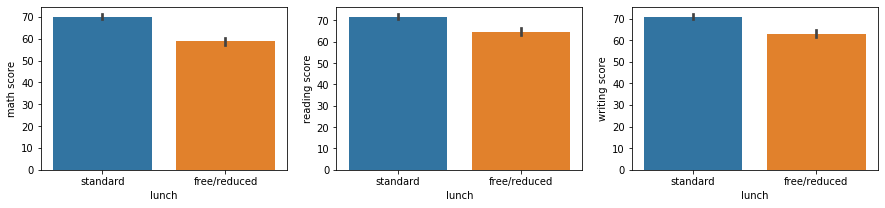

In [27]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df['lunch'], studentsperformance_df['math score'])

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df['lunch'], studentsperformance_df['reading score'])

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df['lunch'], studentsperformance_df['writing score']);

### 3. Does the test preparation course seem to have an effect on the exam performances?

In [15]:
cat_var = 'test preparation course'
categorical_var = studentsperformance_df[cat_var].unique()
grouped_df = studentsperformance_df.groupby(cat_var)
for var in ['math score', 'reading score', 'writing score']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categorical_var)):
        for j in range(i+1, len(categorical_var)):
            print("t-test between groups {0} and {1}:".format(categorical_var[i], categorical_var[j]))
            print(stats.ttest_ind(
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[i]][var], 
                studentsperformance_df[studentsperformance_df[cat_var]==categorical_var[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


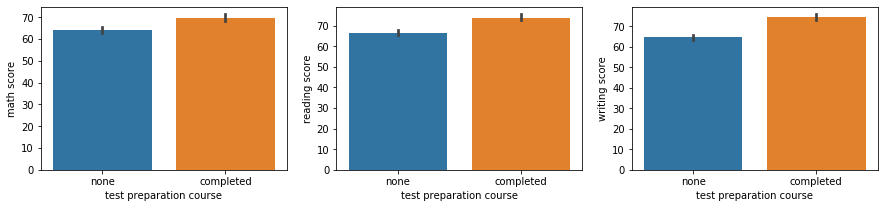

In [28]:
plt.figure(figsize=[15,3])

plt.subplot(1,3,1)
sns.barplot(studentsperformance_df['test preparation course'], studentsperformance_df['math score'])

plt.subplot(1,3,2)
sns.barplot(studentsperformance_df['test preparation course'], studentsperformance_df['reading score'])

plt.subplot(1,3,3)
sns.barplot(studentsperformance_df['test preparation course'], studentsperformance_df['writing score']);

### 4. Which 2 exam scores are most correlated with each other?

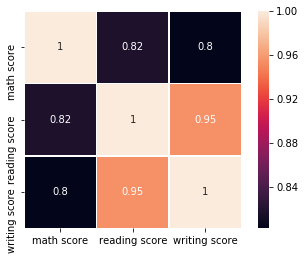

In [16]:
sns.heatmap(studentsperformance_df.corr(), square=True, annot=True, linewidths=.5)
plt.show();